┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00



事後分布の要約:


2-element Vector{ChainDataFrame}:
 Summary Statistics (3 x 8)
 Quantiles (3 x 6)


真の値との比較:

真の値との比較:
True p_head: 0.45, Estimated: 0.44584730838510883
True p_tail: 0.35, Estimated: 0.34322311148079543
True p_stand: 0.20000000000000007, Estimated: 0.21092958013409582


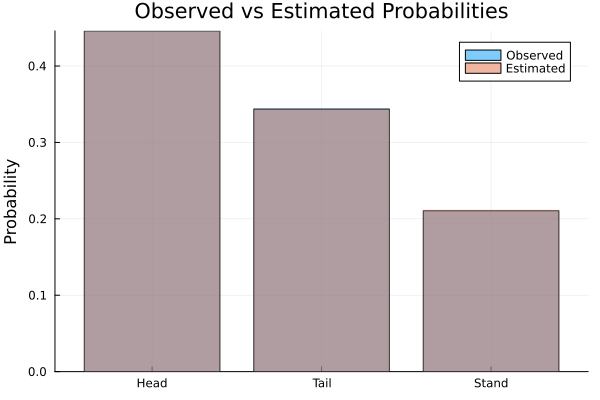

In [18]:
using Turing
using StatsPlots
using Random
using StatsBase

# サンプルデータの生成
Random.seed!(42)
# 真のパラメータ（3つの状態：表、裏、立つ）
true_p_head = 0.45    # 表が出る確率
true_p_tail = 0.35    # 裏が出る確率
# 残りは立つ確率 (0.20)

n_samples = 1000
# 多項分布からサンプリング
p = [true_p_head, true_p_tail, 1 - true_p_head - true_p_tail]
data = rand(Categorical(p), n_samples)

@model function coin_flip(data)
    # Dirichlet分布の事前分布（表、裏、立つ）
    p ~ Dirichlet(ones(3))
    # カテゴリカル分布での尤度（ベクトル化記法）
    data .~ Categorical(p)
end

# MCMCサンプリング
model = coin_flip(data)
chain = sample(model, NUTS(), 2000)

# 結果の可視化
plot(chain)

# 結果の要約
summary_df = describe(chain)
println("\n事後分布の要約:")
display(summary_df)

# 真の値との比較
println("\n真の値との比較:")
# 各パラメータの推定平均値を取得
mean_p_head = mean(chain["p[1]"])
mean_p_tail = mean(chain["p[2]"])
mean_p_stand = mean(chain["p[3]"])

# 真の値との比較
println("\n真の値との比較:")
println("True p_head: $(true_p_head), Estimated: $(mean_p_head)")
println("True p_tail: $(true_p_tail), Estimated: $(mean_p_tail)")
println("True p_stand: $(1-true_p_head-true_p_tail), Estimated: $(mean_p_stand)")

# 観測データと推定された確率の比較
outcomes = ["Head", "Tail", "Stand"]
observed_counts = counts(data, 1:3)
observed_probs = observed_counts ./ length(data)
estimated_probs = [mean_p_head, mean_p_tail, mean_p_stand]

bar(outcomes, observed_probs, alpha=0.5, label="Observed")
bar!(outcomes, estimated_probs, alpha=0.5, label="Estimated")
ylabel!("Probability")
title!("Observed vs Estimated Probabilities")


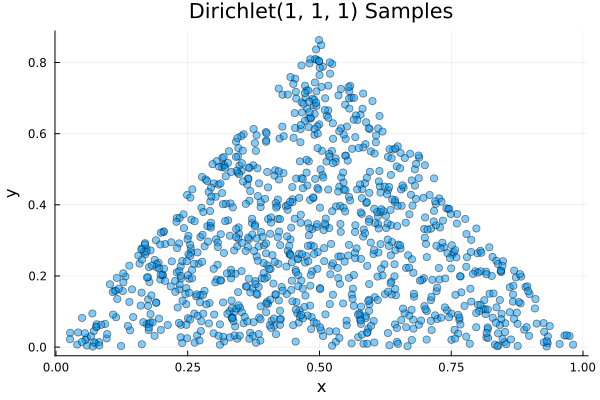

In [17]:
using StatsPlots
using Distributions

# Dirichlet 分布のサンプル生成
dist = Dirichlet(ones(3))  # パラメータ α = [1, 1, 1]
n_samples = 1000
samples = rand(dist, n_samples)  # サンプル生成 (1000個)

# 3次元データを2次元で可視化（三角形の中にプロット）
function barycentric_coordinates(samples)
    x = samples[1, :] + samples[2, :] / 2
    y = samples[2, :] * sqrt(3) / 2
    return x, y
end

x, y = barycentric_coordinates(samples)

# プロット
scatter(x, y, alpha=0.5, label="", xlabel="x", ylabel="y", title="Dirichlet(1, 1, 1) Samples")
